In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# EUmatch = pd.read_csv("/course/data/a2/games/EUmatch.csv")
KRmatch = pd.read_csv("/course/data/a2/games/KRmatch.csv")
# NAmatch = pd.read_csv("/course/data/a2/games/NAmatch.csv")

In [3]:
KRmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            5416 non-null   float64
 1   f_spell            5413 non-null   float64
 2   champion           5387 non-null   object 
 3   side               5448 non-null   object 
 4   assists            5412 non-null   float64
 5   damage_objectives  5413 non-null   float64
 6   damage_building    5430 non-null   float64
 7   damage_turrets     5398 non-null   float64
 8   deaths             5431 non-null   float64
 9   kda                5409 non-null   float64
 10  kills              5428 non-null   float64
 11  level              5426 non-null   float64
 12  time_cc            5433 non-null   float64
 13  damage_taken       5434 non-null   float64
 14  turret_kills       5414 non-null   float64
 15  vision_score       5406 non-null   float64
 16  damage_total       5697 

# Calculate kda by formula

In [4]:
#Calculate kda by formula.
for i in range(len(KRmatch)):
    # Check kda is nan or not, if it is nan, 
    # Then, check if kills, assists and deaths are nan, if all of them are not nan,
    # use formula to calculate.
    if KRmatch['kda'].isnull()[i]: 
        if not KRmatch['kills'].isnull()[i]:
            if not KRmatch['assists'].isnull()[i]:
                if not KRmatch['deaths'].isnull()[i]:
                    if KRmatch['deaths'][i]!=0:
                        KRmatch['kda'][i]=(KRmatch['kills'][i] + KRmatch['assists'][i])/ KRmatch['deaths'][i]
                    else:
                        KRmatch['kda'][i]=(KRmatch['kills'][i] + KRmatch['assists'][i])

/tmp/ipykernel_66/2173037795.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KRmatch['kda'][i]=(KRmatch['kills'][i] + KRmatch['assists'][i])/ KRmatch['deaths'][i]
/tmp/ipykernel_66/2173037795.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KRmatch['kda'][i]=(KRmatch['kills'][i] + KRmatch['assists'][i])


In [5]:
KRmatch, test = train_test_split(KRmatch, test_size=0.33, random_state=1)

In [6]:
print(KRmatch.shape)
print(test.shape)

(3816, 20)
(1881, 20)


# Delete all nan and inf in the EUmatch dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 4186 to 5157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            3619 non-null   float64
 1   f_spell            3622 non-null   float64
 2   champion           3586 non-null   object 
 3   side               3633 non-null   object 
 4   assists            3617 non-null   float64
 5   damage_objectives  3640 non-null   float64
 6   damage_building    3642 non-null   float64
 7   damage_turrets     3606 non-null   float64
 8   deaths             3633 non-null   float64
 9   kda                3789 non-null   float64
 10  kills              3630 non-null   float64
 11  level              3651 non-null   float64
 12  time_cc            3642 non-null   float64
 13  damage_taken       3647 non-null   float64
 14  turret_kills       3616 non-null   float64
 15  vision_score       3628 non-null   float64
 16  damage_total       38

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
4186,7.0,4.0,Jinx,Side.red,10.0,12433.0,24904.0,12433.0,3.0,7.000000,11.0,NaN,16.0,14386.0,5.0,36.0,208974,16963,Other,Many
4194,4.0,14.0,Lulu,Side.red,22.0,2323.0,2323.0,2323.0,4.0,6.500000,4.0,14.0,21.0,12737.0,0.0,71.0,23628,10009,Other,Few
438,4.0,7.0,Lulu,Side.blue,16.0,599.0,1140.0,599.0,6.0,3.166667,3.0,14.0,24.0,15263.0,0.0,97.0,9587,9415,Other,Few
3569,4.0,1.0,Samira,Side.red,5.0,11671.0,11671.0,11671.0,3.0,7.666667,18.0,13.0,3.0,18169.0,4.0,11.0,130535,14055,Other,Many
1475,11.0,4.0,JarvanIV,Side.blue,3.0,0.0,12152.0,0.0,6.0,1.333333,NaN,11.0,8.0,19735.0,0.0,22.0,80462,8638,TopLane_Jungle,Few
1103,12.0,4.0,Lissandra,Side.red,0.0,109.0,366.0,109.0,7.0,0.428571,3.0,13.0,35.0,17984.0,0.0,18.0,104426,7982,Other,Many
561,14.0,4.0,Thresh,Side.red,20.0,847.0,2873.0,847.0,3.0,7.000000,1.0,15.0,31.0,17102.0,0.0,73.0,23658,8765,Other,Few
4062,12.0,4.0,NaN,Side.blue,5.0,593.0,NaN,593.0,4.0,1.250000,0.0,10.0,11.0,8749.0,0.0,13.0,46961,5127,TopLane_Jungle,Many
1419,11.0,4.0,LeeSin,Side.blue,1.0,0.0,1942.0,0.0,7.0,0.285714,1.0,10.0,6.0,17611.0,0.0,15.0,72897,5379,TopLane_Jungle,Few
5501,4.0,7.0,Caitlyn,Side.blue,6.0,7751.0,13093.0,7751.0,9.0,2.111111,NaN,14.0,14.0,18697.0,3.0,35.0,174217,15229,Other,Many


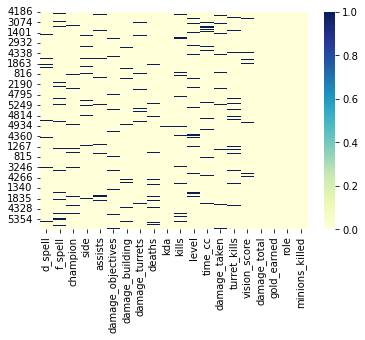

In [7]:
import seaborn as sb
sb.heatmap(KRmatch.isnull(),cmap="YlGnBu")

#check null values
KRmatch.isnull().sum()
KRmatch.drop_duplicates()
KRmatch.info()
KRmatch.head(10)
#cDelete all nan in the KRmatch dataset
#KRmatch.replace([np.inf, -np.inf], np.nan, inplace=True)
#kr=KRmatch.dropna()

In [8]:
#drop all NaN values in kda
kr = KRmatch.dropna(how='all', subset=['kda'])
kr.isnull().sum()

d_spell              196
f_spell              193
champion             228
side                 182
assists              188
damage_objectives    176
damage_building      173
damage_turrets       210
deaths               174
kda                    0
kills                177
level                165
time_cc              172
damage_taken         167
turret_kills         199
vision_score         188
damage_total           0
gold_earned            0
role                   0
minions_killed         0
dtype: int64

In [9]:
#delete catergoryical data
#modify_data = modify_data.fillna(modify_data.mean())
#modify_data= modify_data.dropna()
#modify_data.head(5)
kr = kr.dropna(how='any',
                subset=['side', 'champion'])
kr.isnull().sum()
kr=kr.fillna(kr.median())
print(kr.isnull().sum())
kr.info()
#check if has inf value
kr.isin([np.inf, -np.inf])
kr.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
kr.dropna(inplace=True)
kr.info()

d_spell              0
f_spell              0
champion             0
side                 0
assists              0
damage_objectives    0
damage_building      0
damage_turrets       0
deaths               0
kda                  0
kills                0
level                0
time_cc              0
damage_taken         0
turret_kills         0
vision_score         0
damage_total         0
gold_earned          0
role                 0
minions_killed       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 4186 to 5157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            3395 non-null   float64
 1   f_spell            3395 non-null   float64
 2   champion           3395 non-null   object 
 3   side               3395 non-null   object 
 4   assists            3395 non-null   float64
 5   damage_objectives  3395 non-null   float64
 6   damage_building    3395 non-

/tmp/ipykernel_66/1926961596.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kr=kr.fillna(kr.median())


**Role**

<AxesSubplot:ylabel='role'>

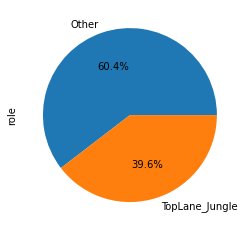

In [10]:
(kr.groupby('role')['role'].count()).plot.pie(autopct='%1.1f%%')

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='role', ylabel='count'>

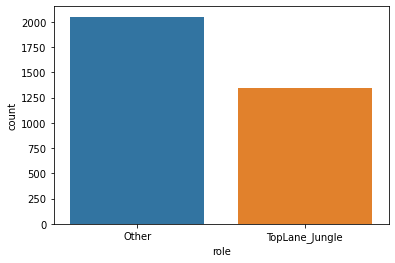

In [11]:
sns.countplot('role',data=kr)

**Side**

In [12]:
side_count=(kr.groupby(['side','role'])['role'].count())

In [13]:
side_count

side       role          
Side.blue  Other             1023
           TopLane_Jungle     660
Side.red   Other             1028
           TopLane_Jungle     684
Name: role, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='side', ylabel='count'>

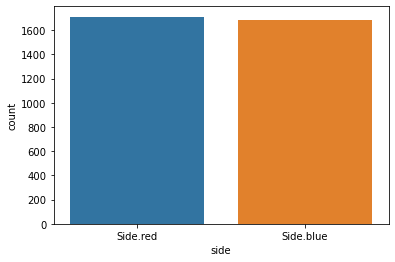

In [14]:
sns.countplot('side',data=kr)

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='side', ylabel='count'>

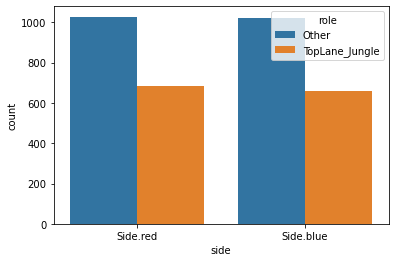

In [15]:
sns.countplot('side',hue='role',data=kr)

In [16]:
minions_killed_count=(kr.groupby(['minions_killed','role'])['role'].count())

In [17]:
minions_killed_count

minions_killed  role          
Few             Other              728
                TopLane_Jungle     696
Many            Other             1323
                TopLane_Jungle     648
Name: role, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minions_killed', ylabel='count'>

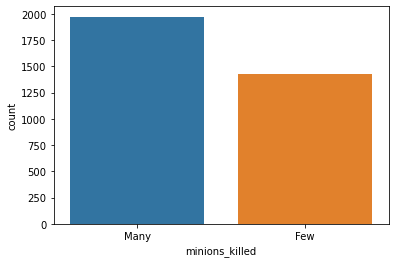

In [18]:
sns.countplot('minions_killed',data=kr)

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minions_killed', ylabel='count'>

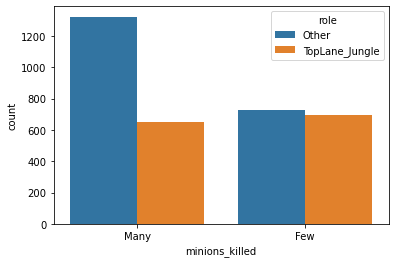

In [19]:
sns.countplot('minions_killed',hue='role',data=kr)

# Convert category variable to factor

In [20]:
# convert category variable to factor
kr['role']=kr['role'].replace({'Other':0})
kr['role']=kr['role'].replace({'TopLane_Jungle':1})
kr[['side', 'champion','minions_killed']] = kr[['side', 'champion','minions_killed']].apply(lambda x: pd.factorize(x)[0])

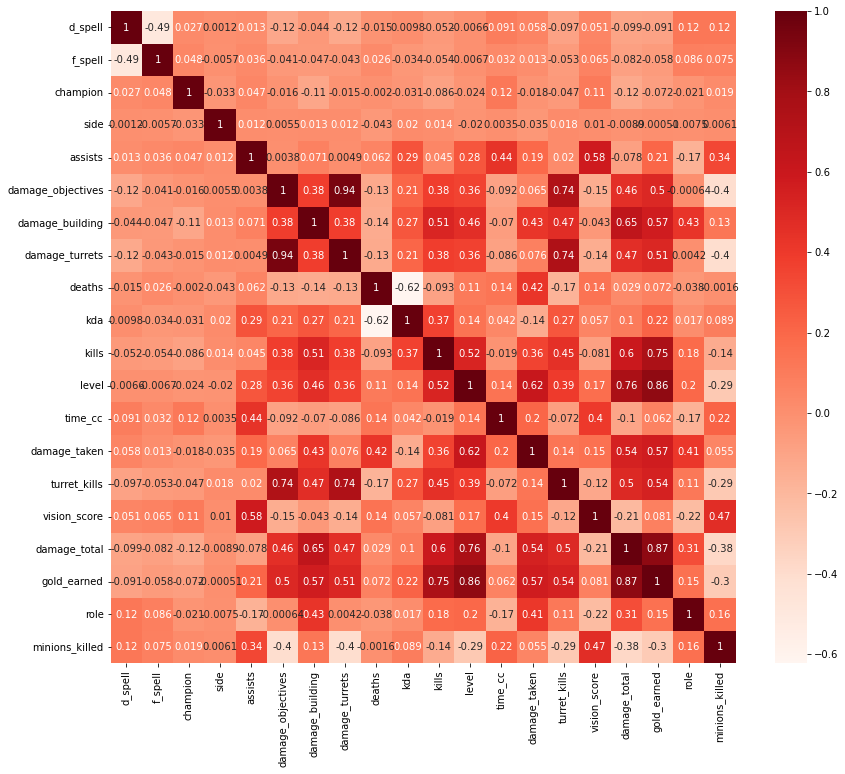

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = kr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Feature Selection - Chi-square test

In [22]:
y_train = kr['role']
X_train = kr.drop(columns=['role'])

In [23]:
features = X_train
class_label = y_train
ALPHA = 0.05

In [24]:
import scipy.stats as stats

from scipy.stats import chi2_contingency
filtered_features = []

for feature in (X_train.columns):
    cont_table = pd.crosstab(class_label, features[feature])
    chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
    print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
    if(p < ALPHA): 
        filtered_features.append(feature)
        print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
    else:
        print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
        
print('Feature set after filtering with Chi-square test:', filtered_features)

Chi2 value for feature "d_spell": 1107.3376
Reject the Null Hypothesis for feature "d_spell", p-value 0.0000

Chi2 value for feature "f_spell": 724.2697
Reject the Null Hypothesis for feature "f_spell", p-value 0.0000

Chi2 value for feature "champion": 2639.5004
Reject the Null Hypothesis for feature "champion", p-value 0.0000

Chi2 value for feature "side": 0.1931
Fail to reject the Null Hypothesis for feature "side", p-value 0.6604

Chi2 value for feature "assists": 118.6778
Reject the Null Hypothesis for feature "assists", p-value 0.0000

Chi2 value for feature "damage_objectives": 2224.4381
Reject the Null Hypothesis for feature "damage_objectives", p-value 0.0244

Chi2 value for feature "damage_building": 2987.3672
Reject the Null Hypothesis for feature "damage_building", p-value 0.0002

Chi2 value for feature "damage_turrets": 2213.8535
Reject the Null Hypothesis for feature "damage_turrets", p-value 0.0274

Chi2 value for feature "deaths": 11.2646
Fail to reject the Null Hypoth

In [25]:
from sklearn import preprocessing
X_train=X_train[filtered_features]
# X_scale=preprocessing.normalize(X_fs)

# Preprocessing test data

In [26]:
test.drop_duplicates()

test = test.dropna(how='all', subset=['kda'])
test.isnull().sum()

test = test.dropna(how='any',
                subset=['side', 'champion'])
test=test.fillna(test.median())
print(test.isnull().sum())
test.info()
#check if has inf value
test.isin([np.inf, -np.inf])
test.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
test.dropna(inplace=True)
test.info()

d_spell              0
f_spell              0
champion             0
side                 0
assists              0
damage_objectives    0
damage_building      0
damage_turrets       0
deaths               0
kda                  0
kills                0
level                0
time_cc              0
damage_taken         0
turret_kills         0
vision_score         0
damage_total         0
gold_earned          0
role                 0
minions_killed       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 3506 to 4431
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_spell            1727 non-null   float64
 1   f_spell            1727 non-null   float64
 2   champion           1727 non-null   object 
 3   side               1727 non-null   object 
 4   assists            1727 non-null   float64
 5   damage_objectives  1727 non-null   float64
 6   damage_building    1727 non-

/tmp/ipykernel_66/1010060874.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test=test.fillna(test.median())


# category variable to factor

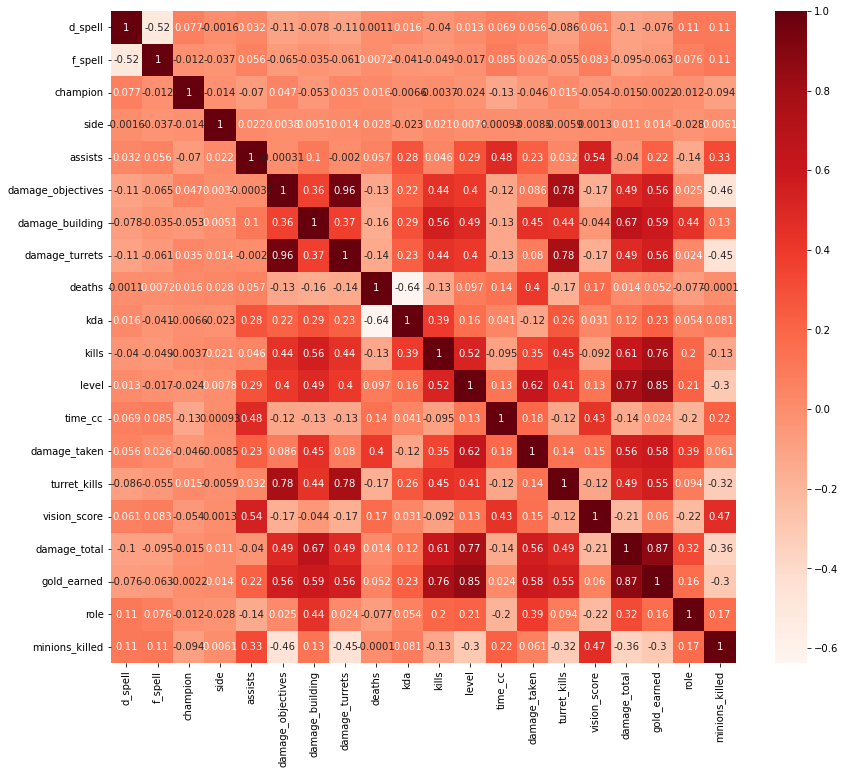

In [27]:
test['role']=test['role'].replace({'Other':0})
test['role']=test['role'].replace({'TopLane_Jungle':1})
test[['side', 'champion','minions_killed']] = test[['side', 'champion','minions_killed']].apply(lambda x: pd.factorize(x)[0])
plt.figure(figsize=(14,12))
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Chi-square test

In [28]:
y_test = test['role']
X_test = test.drop(columns=['role'])
print('test', X_test.shape, y_test.shape)

test (1727, 19) (1727,)


In [29]:
features_test = X_test
class_label_test = y_test
ALPHA = 0.05

In [30]:
filtered_features_test = []

for feature in (X_test.columns):
     cont_table = pd.crosstab(class_label_test, features_test[feature])
     chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
    
     print(f'Chi2 value for feature "{feature}": {chi2_val:.4f}')
    
     if(p < ALPHA): 
         filtered_features_test.append(feature)
         print(f'Reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')
     else:
         print(f'Fail to reject the Null Hypothesis for feature "{feature}", p-value {p:.4f}\n')  

Chi2 value for feature "d_spell": 555.4383
Reject the Null Hypothesis for feature "d_spell", p-value 0.0000

Chi2 value for feature "f_spell": 402.4704
Reject the Null Hypothesis for feature "f_spell", p-value 0.0000

Chi2 value for feature "champion": 1306.2462
Reject the Null Hypothesis for feature "champion", p-value 0.0000

Chi2 value for feature "side": 1.3434
Fail to reject the Null Hypothesis for feature "side", p-value 0.2464

Chi2 value for feature "assists": 59.4586
Reject the Null Hypothesis for feature "assists", p-value 0.0007

Chi2 value for feature "damage_objectives": 1267.2345
Fail to reject the Null Hypothesis for feature "damage_objectives", p-value 0.1191

Chi2 value for feature "damage_building": 1559.4684
Fail to reject the Null Hypothesis for feature "damage_building", p-value 0.0642

Chi2 value for feature "damage_turrets": 1278.3924
Fail to reject the Null Hypothesis for feature "damage_turrets", p-value 0.1547

Chi2 value for feature "deaths": 15.4634
Fail to 

In [31]:
X_test=test[filtered_features]
y_test = test['role']

# KNN

In [32]:

from sklearn.neighbors import KNeighborsClassifier
# Create and fit knn with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit to the train dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# Note that we're calculating the accuracy score for the test data
y_pred_knn = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.768384481760278


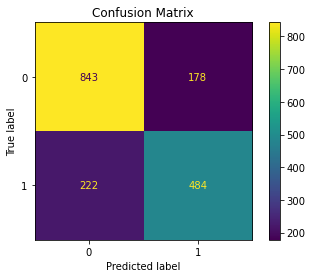

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_knn, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
precision_knn = metrics.precision_score(y_test, y_pred_knn)
recall_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn=(2*precision_knn*recall_knn)/(precision_knn+recall_knn)
print("F1:",f1_knn)

Accuracy: 0.768384481760278
Precision: 0.7311178247734139
Recall: 0.6855524079320113
F1: 0.7076023391812865


In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

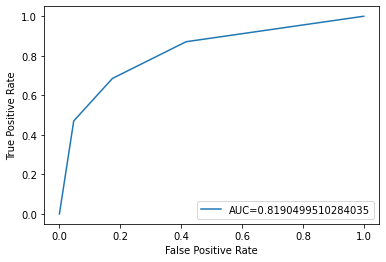

In [37]:
#AUC
y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_knn))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
# print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))

/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


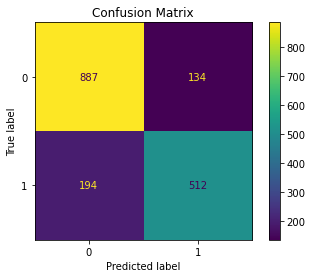

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_lr, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
f1_lr=(2*precision_lr*recall_lr)/(precision_lr+recall_lr)
print("F1:",f1_lr)

Accuracy: 0.8100752750434279
Precision: 0.7925696594427245
Recall: 0.7252124645892352
F1: 0.7573964497041419


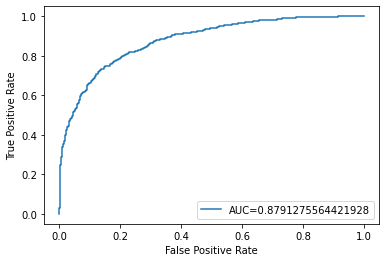

In [42]:
#AUC
y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba_lr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_lr))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree

In [43]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_dt,y_test))

The accuracy of the Logistic Regression is 0.8100752750434279


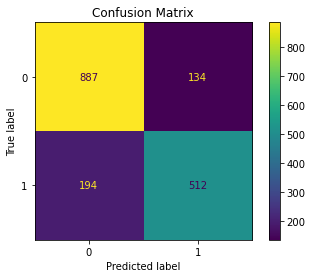

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_dt, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
f1_dt=(2*precision_dt*recall_dt)/(precision_dt+recall_dt)
print("F1:",f1_dt)

Accuracy: 0.8100752750434279
Precision: 0.7925696594427245
Recall: 0.7252124645892352
F1: 0.7573964497041419


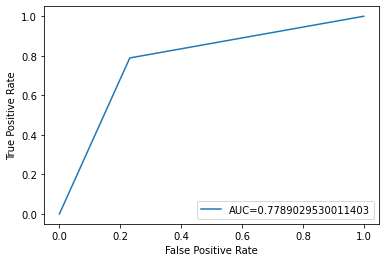

In [46]:
#AUC
y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
auc_dt = metrics.roc_auc_score(y_test, y_pred_proba_dt)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_dt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(y_pred_rf,y_test))

The accuracy of the Random Forest is 0.8755066589461494


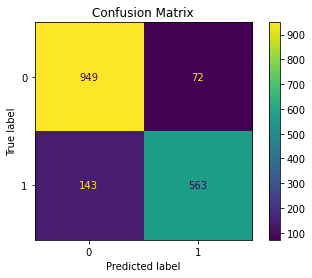

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion matrix (variable name)
cm = confusion_matrix(y_test, # test data
                      y_pred_rf, # predictions
                      labels=[0,1] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix")
plt.show()

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf=(2*precision_rf*recall_rf)/(precision_rf+recall_rf)
print("F1:",f1_rf)

Accuracy: 0.8755066589461494
Precision: 0.8866141732283465
Recall: 0.7974504249291785
F1: 0.8396718866517524


AUC:0.9440572343394938


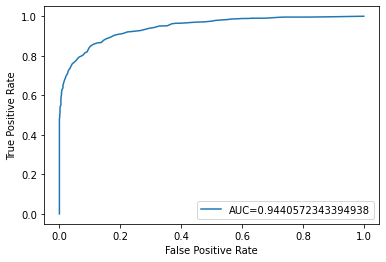

In [50]:
#AUC
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
print("AUC:"+str(auc_rf))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()